In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import os
from cancer_games import CancerGame
from fears.utils import plotter

cc = plotter.gen_color_cycler(style='solid',n_colors=4,palette='colorblind')
cc_dict = cc.by_key()
c = cc_dict['color']

color_list = cc.by_key()['color']

def atoi(text):
    return int(text) if text.isdigit() else text

def natural_keys(text):
    '''
    alist.sort(key=natural_keys) sorts in human order
    http://nedbatchelder.com/blog/200712/human_sorting.html
    (See Toothy's implementation in the comments)
    '''
    return [ atoi(c) for c in re.split(r'(\d+)', text) ]

/Users/kinge2/repos/msw_analysis/cancer_games.py:856: RuntimeWarning: invalid value encountered in scalar power
  y = gmax + ((gmin - gmax) * conc**hc) / (ic_50**hc + conc**hc)


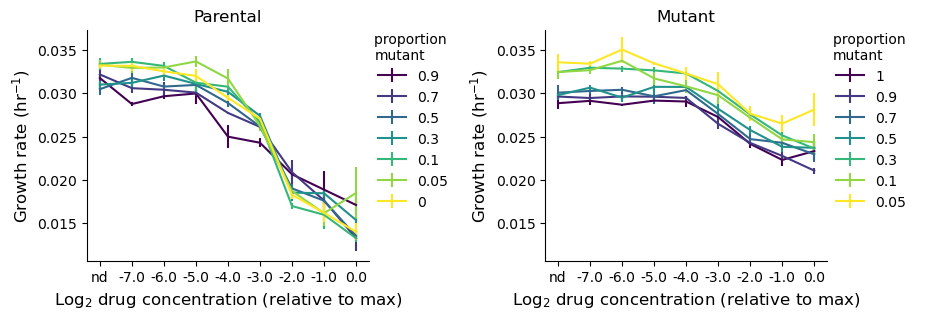

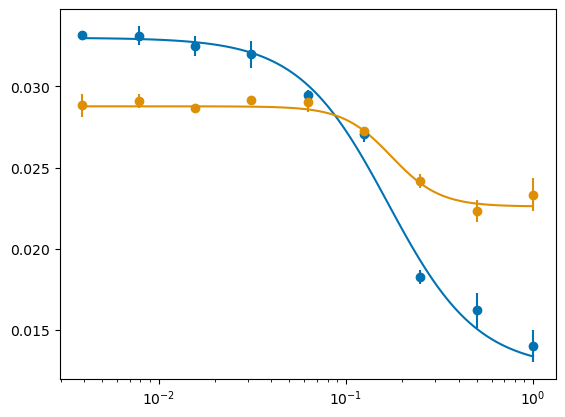

In [20]:
exp_folder = 'data/1_Game_parental_vs_braf_Gef_091222'

cg = CancerGame(exp_folder)
cg.execute()

fig,ax = plt.subplots()

data = cg.fitness_parental
dr_params = cg.parental_dr_params

ax.errorbar(cg.dc,data[0]['avg'],yerr=data[0]['err'],fmt='o',label='Parental',
            color=color_list[0])

xfit = np.logspace(np.min(np.log10(cg.dc)),
                    np.max(np.log10(cg.dc)),100)

yfit = cg.hill_fn(xfit,*dr_params[0])
ax.plot(xfit,yfit,color=color_list[0],label='Parental fit')

data = cg.fitness_resistant
dr_params = cg.mutant_dr_params

ax.errorbar(cg.dc,data[1]['avg'],yerr=data[1]['err'],fmt='o',label='Parental',
            color=color_list[1])

xfit = np.logspace(np.min(np.log10(cg.dc)),
                    np.max(np.log10(cg.dc)),100)
yfit = cg.hill_fn(xfit,*dr_params[1])
ax.plot(xfit,yfit,color=color_list[1],label='Parental fit')

ax.set_xscale('log')
